# Problem Statement

Assuming we have a set of points that all belong to a single line. By choosing two points we can calculate the characteristics of the line and assuming we have no statistical error we can prove that all other points are part of the line

However we will always have measurement errors with Lidar, therefore we need to use statistical methods to fit a line through the points that minimizez the error

## Ideal Situation

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from LidarSim.lidar_sim import LidarSimulator

In [117]:
lidar = LidarSimulator("rectangle.stl")
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=np.radians(90), view_range=60)
triangles = lidar.get_map_triangles()

In [118]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

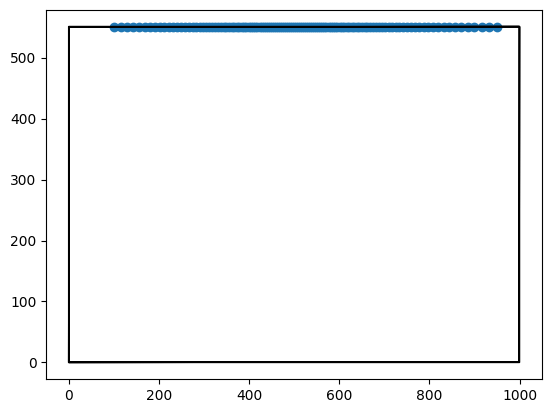

In [119]:
fig,ax = plt.subplots()
plt.scatter (x, y)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)

In [120]:
m = (y[-1] - y[0]) / (x[-1] - x[0])
b = y[-1] - m * x[-1]
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - m * x[i] - b)
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: 0.00, median: 0.00, standard deviation: 0.00


# With statistical error

In [121]:
lidar = LidarSimulator("rectangle.stl", error=0.02)
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=np.radians(90), view_range=60)
triangles = lidar.get_map_triangles()

In [122]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

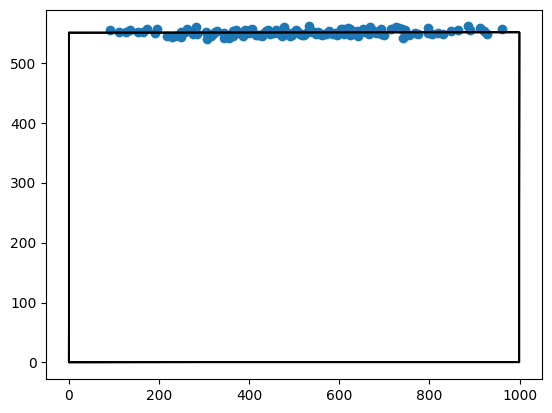

In [123]:
fig,ax = plt.subplots()
plt.scatter (x, y)
for t in triangles:
    ax.fill(t[:, 0],t[:, 1],fill=False)

In [124]:
m = (y[-1] - y[0]) / (x[-1] - x[0])
b = y[-1] - m * x[-1]
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - m * x[i] - b)
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: -4.89, median: -5.58, standard deviation: 4.54


## Statistical Line Fitting

In [125]:
model = np.polyfit (x, y, 1)

In [126]:
y_err = []
for i in range(len(x)):
    y_err.append(y[i] - model[0] * x[i] - model[1])
    
y_err = np.array(y_err)
print("mean: %0.2f, median: %0.2f, standard deviation: %0.2f" % (np.mean(y_err), np.median(y_err), np.std(y_err)))

mean: 0.00, median: -0.36, standard deviation: 4.49


In [127]:
x[-1]

91.95769252220356

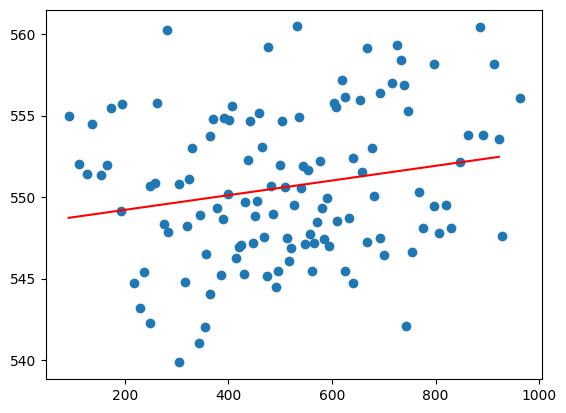

In [128]:
x_lin_reg = np.arange(x[-1], x[1], 10)
predict = np.poly1d(model)
y_lin_reg = predict(x_lin_reg)

fig,ax = plt.subplots()
plt.scatter (x, y)
plt.plot (x_lin_reg, y_lin_reg, c = 'r')

## Fitting a line with Least Square Method

Reference: https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit

Step 1: Calculate the mean of the x -values and the mean of the y -values.

$$\overline{X} = \frac{\sum_{i=1}^nx_i}{n}$$
$$\overline{Y} = \frac{\sum_{i=1}^ny_i}{n}$$

Step 2: The following formula gives the slope of the line of best fit:

$$m = \frac{\sum_{i=1}^n(x_i-\overline{X})(y_i-\overline{Y})}{\sum_{i=1}^n(x_i-\overline{X})^2}$$


Step 3: Compute the y-intercept of the line by using the formula:

$$b = \overline{Y} - m \overline{X}$$

Step 4: Use the slope m and the y -intercept b to form the equation of the line.


To contruct a perpendicular line we have to solve the equations

$$y = mx + b$$
$$y = -\frac{1}{m}x$$

In [129]:
angles = np.arange(0, 85, 5)
values = [0.5197, 0.4404, 0.4850, 0.4222, 0.4132, 0.4371, 0.3912, 0.3949, 0.3919, 0.4276, 0.4075, 0.3956, 0.4053, 0.4752, 0.5032, 0.5273, 0.4879]

In [130]:
# get carthesian coordinates
x_cart = []
y_cart = []
for i in range(len(values)):
    r = values[i]
    alpha = np.radians(angles[i])
    x_cart.append(r * np.cos(alpha))
    y_cart.append(r * np.sin(alpha))

In [131]:
# Calculate centroid
X = np.average(x_cart)
Y = np.average(y_cart)

In [132]:
# calculate line parameters
X_d = (np.array(x_cart) - X)
Y_d = (np.array(y_cart) - Y)
X_d_2 = X_d * X_d
m = (X_d * Y_d).sum() / X_d_2.sum()
b = Y - m * X

In [133]:
# calculate line

line = np.empty((2,2))
line[0,0] = np.array(x_cart).min()
line[1,0] = np.array(x_cart).max()
line[0,1] = m * line[0,0] + b
line[1,1] = m * line[1,0] + b

In [134]:
# caclulate perpendicular line
x = -b*m/(m*m+1)
y = -x/m

(-0.025985000000000005,
 0.5456850000000001,
 -0.034309997394643715,
 0.5597197002622666)

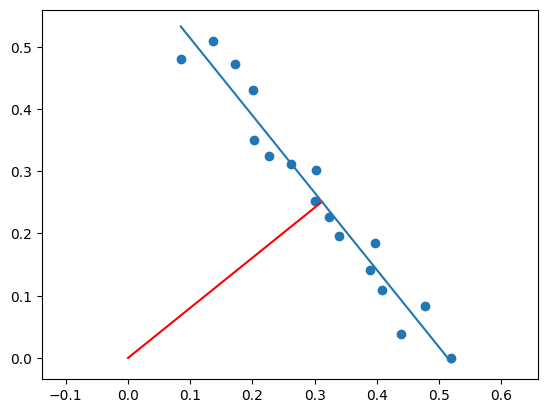

In [135]:
fig,ax = plt.subplots()
plt.plot([0, x], [0, y], c = 'r')
plt.plot(line[:, 0], line[:, 1])
plt.scatter (x_cart, y_cart)
ax.axis('equal')

In [136]:
alpha = np.arctan2(y, x)
r = np.sqrt(x**2 + y**2)
print("alpha = %.2f r = %.2f" % (np.degrees(alpha), r))

alpha = 38.85 r = 0.40


In [137]:
def fitLine(x, y):
    X = np.average(x)
    Y = np.average(y)
    X_d = (np.array(x) - X)
    Y_d = (np.array(y) - Y)
    X_d_2 = X_d * X_d
    X_d_2_sum = X_d_2.sum()
    if np.isclose([X_d_2_sum], [0.0])[0]:
        if X >= 0:
            alpha = 0.0
            r = X
        else:
            alpha = np.pi
            r = -X
        return None, None, alpha, r
    m = (X_d * Y_d).sum() / X_d_2.sum()
    b = Y - m * X
    # caclulate perpendicular line
    x_p = -b*m/(m*m+1)
    if np.isclose([m], [0.0])[0]:
        if Y >= 0:
            alpha = np.pi / 2
            r = Y
        else:
            alpha = 3 * np.pi / 2
            r = -Y
        return None, None, alpha, r
    y_p = -x_p/m
    alpha = np.arctan2(y_p, x_p)
    r = np.sqrt(x_p**2 + y_p**2)
    return m, b, alpha, r

In [138]:
x_cart = -1 * np.array(x_cart)
y_cart = -1 * np.array(y_cart)

In [139]:
m, b, alpha, r = fitLine(x_cart, y_cart)
print("alpha = %.2f r = %.2f" % (np.degrees(alpha), r))

alpha = -141.15 r = 0.40


In [140]:
# calculate line

line = np.empty((2,2))
line[0,0] = np.array(x_cart).min()
line[1,0] = np.array(x_cart).max()
line[0,1] = m * line[0,0] + b
line[1,1] = m * line[1,0] + b

In [141]:
# caclulate perpendicular line
x = -b*m/(m*m+1)
y = -x/m

(-0.5456850000000001,
 0.025985000000000005,
 -0.5597197002622666,
 0.034309997394643715)

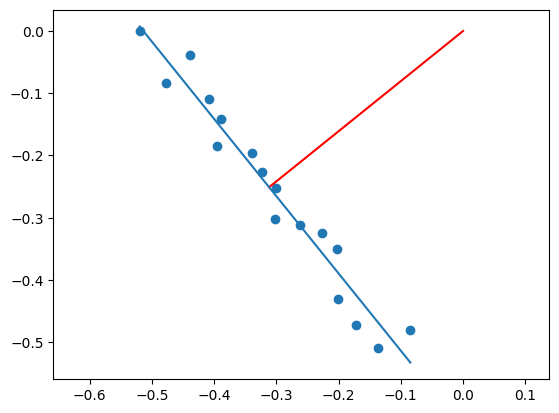

In [142]:
fig,ax = plt.subplots()
plt.plot([0, x], [0, y], c = 'r')
plt.plot(line[:, 0], line[:, 1])
plt.scatter (x_cart, y_cart)
ax.axis('equal')

In [143]:
cosA = np.cos(alpha);
sinA = np.sin(alpha);

xcosA = x_cart * cosA;
ysinA = y_cart * sinA;


In [48]:
m, b, alpha, r = fitLine([0, 1], [1, 0])
np.testing.assert_allclose([alpha, r], [np.pi / 4, np.sqrt(0.5)])

In [49]:
m, b, alpha, r = fitLine([-1, 0], [0, 1])
np.testing.assert_allclose([alpha, r], [3 * np.pi / 4, np.sqrt(0.5)])

In [50]:
m, b, alpha, r = fitLine([-1, 1], [1, 1])
np.testing.assert_allclose([alpha, r], [np.pi/2, 1.0])

In [53]:
m, b, alpha, r = fitLine([-1, 1], [-1, -1])
np.testing.assert_allclose([alpha, r], [3 * np.pi / 2, 1.0])

In [54]:
m, b, alpha, r = fitLine([1, 1], [1, -1])
np.testing.assert_allclose([alpha, r], [0.0, 1.0])

In [55]:
m, b, alpha, r = fitLine([-1, -1], [1, -1])
np.testing.assert_allclose([alpha, r], [np.pi, 1.0])

In [115]:
rng = np.random.default_rng(seed=43)
for i in range(30):
    alpha_expected = rng.uniform(low=-np.pi, high=np.pi)
    r_expected = rng.uniform(low=1.0, high=2.0)
    ts = np.arange(-1.0, 1.1, 0.1)
    p = [r_expected * np.cos(alpha_expected), r_expected * np.sin(alpha_expected)]
    v = [ -np.sin(alpha_expected), np.cos(alpha_expected)]
    x_cart = p[0] + v[0] * ts
    y_cart = p[1] + v[1] * ts
    m, b, alpha, r = fitLine(x_cart, y_cart)
    np.testing.assert_allclose([alpha, r], [alpha_expected, r_expected])
    error = rng.uniform(low=-0.01, high=0.01, size=(2, len(ts)))
    x_cart += error[0]
    y_cart += error[1]
    m, b, alpha, r = fitLine(x_cart, y_cart)
    np.testing.assert_allclose([alpha, r], [alpha_expected, r_expected], atol=0.01)

## Fitting a line with Polar Coordinates

$\sigma_i^2$ is the variance that models the uncertainty regarding distance $\rho_i$ of a particular sensor measurement

$$w_i = \frac{1}{\sigma_i^2}$$

$$\alpha = \frac{1}{2}atan\left(\frac{\sum w_i\rho_i^2sin2\theta_i-\frac{2}{\sum_{w_i}}\sum\sum w_i w_j \rho_i \rho_j cos\theta_i sin\theta_j}{\sum w_i\rho_i^2cos2\theta_i-\frac{1}{\sum_{w_i}}\sum\sum w_i w_j \rho_i \rho_j cos(\theta_i + \theta_j)}\right)$$

$$r = \frac{\sum w_i \theta_i cos(\theta_i - \alpha)}{\sum w_i}$$

## TODO
c = np.cos(angles)
c2 = np.cos(2 * angles)
s = np.sin(angles)
s2 = np.sin(2 * angles)
r_square = np.array(values)**2
N = angles.shape[0]
y = r_square * s2 - 2/N * np.array(values) * c * np.array(values) * s
x = r_square * c2 - csIJ / N;
alpha = 0.5 * (atan2(y, x) + pi);
r = rho * cos(theta - ones(size(theta)) * alpha)' / N;